# Goal 1: Attacking Players v Remaining Players Valuations

# Goal 1: Load Data

In [0]:
# Load 6 data frames for fifa ultimate team mode player data (more skill specific stats)
players_15 = spark.read.format("csv").option("inferSchema", "true").option("header", "true").load("dbfs:/FileStore/shared_uploads/stephen.mcgowan@symphonytalent.com/players_15.csv")
players_16 = spark.read.format("csv").option("inferSchema", "true").option("header", "true").load("dbfs:/FileStore/shared_uploads/stephen.mcgowan@symphonytalent.com/players_16.csv")
players_17 = spark.read.format("csv").option("inferSchema", "true").option("header", "true").load("dbfs:/FileStore/shared_uploads/stephen.mcgowan@symphonytalent.com/players_17.csv")
players_18 = spark.read.format("csv").option("inferSchema", "true").option("header", "true").load("dbfs:/FileStore/shared_uploads/stephen.mcgowan@symphonytalent.com/players_18.csv")
players_19 = spark.read.format("csv").option("inferSchema", "true").option("header", "true").load("dbfs:/FileStore/shared_uploads/stephen.mcgowan@symphonytalent.com/players_19.csv")
players_20 = spark.read.format("csv").option("inferSchema", "true").option("header", "true").load("dbfs:/FileStore/shared_uploads/stephen.mcgowan@symphonytalent.com/players_20.csv")
players_21 = spark.read.format("csv").option("inferSchema", "true").option("header", "true").load("dbfs:/FileStore/shared_uploads/stephen.mcgowan@symphonytalent.com/players_21.csv")

In [0]:
# Check the shape of Playesr from 2015 and 2020, they have the same features (rows are comparable).
print("Players 15: Rows:",players_15.count(),", Columns:", len(players_15.columns))
print("Players 21: Rows:",players_21.count(),", Columns:", len(players_21.columns))

Players 15: Rows: 16155 , Columns: 106
Players 21: Rows: 18944 , Columns: 106

In [0]:
# used to drop columns that are never used
columns_to_drop_player_list = ['player_url', 'long_name', 'dob', 'nationality', 'club_name', 'league_name', 'player_positions', 'body_type', 'real_face', 'player_tags', 'release_clause_eur', 'team_jersey_number', 'loaned_from', 'joined', 'nation_position', 'nation_jersey_number', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'player_traits', 'player_positions', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'defending_marking', 'contract_valid_until']

# used to signify columns that are ~ always used
columns_to_use = ['sofifa_id', 'short_name', 'age', 'height_cm', 'weight_kg', 'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'team_position', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_standing_tackle', 'defending_sliding_tackle']

# used to signify columns that are always used but without the sofifa_id primary key
columns_to_use_nofifaId = ['short_name', 'age', 'height_cm', 'weight_kg', 'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'team_position', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_standing_tackle', 'defending_sliding_tackle']

# Goal 1: User Defined Functions (UDF)

In [0]:
# Remove all unused columns as defined in list above. These columns are not used at any stage
# Also remove all goalkeepers - goal keepers are complete outliers in the football world and 
# are often not valued the same as the the rest of the players.
# gks also play later in their careers

def remove_unused_columns(df):
  df = df.drop(*columns_to_drop_player_list)
  df = df.filter(df.team_position != 'GK')\
    .filter(df.team_position != 'SUB')\
    .filter(df.team_position != 'RES')
  return df

In [0]:
def print_player_datasets_size():
  print("Players 15: Rows:", players_15.count(),", Columns:", len(players_15.columns))
  print("Players 16: Rows:", players_16.count(),", Columns:", len(players_16.columns))
  print("Players 17: Rows:", players_17.count(),", Columns:", len(players_17.columns))
  print("Players 18: Rows:", players_18.count(),", Columns:", len(players_18.columns))
  print("Players 19: Rows:", players_19.count(),", Columns:", len(players_19.columns))
  print("Players 20: Rows:", players_20.count(),", Columns:", len(players_20.columns))
  print("Players 21: Rows:", players_21.count(),", Columns:", len(players_21.columns))
  
def print_datasets_size(df):
  print("Rows:", df.count(),", Columns:", len(df.columns))

# Goal 1: Data Pre-Processing

In [0]:
# Remove all unused columns from players data sets.
# More specific column filtering to be done per data set later.
players_15 = remove_unused_columns(players_15)
players_16 = remove_unused_columns(players_16)
players_17 = remove_unused_columns(players_17)
players_18 = remove_unused_columns(players_18)
players_19 = remove_unused_columns(players_19)
players_20 = remove_unused_columns(players_20)
players_21 = remove_unused_columns(players_21)

print_player_datasets_size()
print(players_21.columns)

Players 15: Rows: 5770 , Columns: 50
Players 16: Rows: 5749 , Columns: 50
Players 17: Rows: 6320 , Columns: 50
Players 18: Rows: 6470 , Columns: 50
Players 19: Rows: 6510 , Columns: 50
Players 20: Rows: 6680 , Columns: 50
Players 21: Rows: 6810 , Columns: 50
['sofifa_id', 'short_name', 'age', 'height_cm', 'weight_kg', 'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'team_position', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_standing_tackle', 'defending_sliding_tackle']

In [0]:
# The first goal consists of analysing whether or not attacking players are valued higher than other positions (DEF/MID)
# For this the data set from 2021 will be used. 

In [0]:
# Create a list of Attacking positions
# Print list of all available positions
display(players_21.select("team_position").distinct())

team_position
RF
LWB
LCM
LM
RDM
LF
CAM
RAM
LB
LW


In [0]:
# Create list of attacking positions based off of all positions
# C/R/L = Centre/Right/Left
# A = Attacking
# M = Midfield
# W = Wing
# F/S/ST = Forward/Striker/Striker
attacking_positions = ['CAM', 'RAM', 'LAM', 'LM','RM', 'LW', 'RW', 'RF', 'LF', 'RS', 'LS', 'CF', 'ST']

In [0]:
# Create a data frame of attacking players
players_21_att = players_21.filter(players_21.team_position.isin(attacking_positions))
# Create a data frame of remaining players
players_21_rem = players_21.filter(players_21.team_position.isin(attacking_positions) == False)
# Rows decreased from 18038 to 2455. 
print_datasets_size(players_21_att)
print_datasets_size(players_21_rem)

Rows: 2455 , Columns: 50
Rows: 4355 , Columns: 50

In [0]:
# 128 rows
# attacking players
players_21_att = players_21_att.dropna()

# 1,906 rows
# non-attacking players
players_21_rem = players_21_rem.dropna()

print_datasets_size(players_21_att)
print_datasets_size(players_21_rem)

Rows: 2455 , Columns: 50
Rows: 4355 , Columns: 50

# Goal 1: Data Processing

In [0]:
from itertools import chain
from pyspark.sql.functions import create_map, lit

# Apply a weight for attacking dataframe.
# The further up the pitch the player plays - the higher the weight.
weight_dict = {'LB': 0.2, 'RB': 0.2, 'LCB': 0.2, 'RCB': 0.2, 'CB': 0.2, 'LWB' : 0.4, 'RWB': 0.4, 'LDM': 0.6, 'RDM': 0.6, 'CDM': 0.6, 'LCM': 0.8, 'RCM': 0.8, 'CM': 0.8, 'CAM' : 1.0, 'RAM': 1.0, 'LAM': 1.0, 'LM': 1.2,'RM': 1.2, 'LW': 1.4, 'RW': 1.4, 'RF': 1.6, 'LF': 1.6, 'RS': 1.8, 'LS': 1.8, 'CF': 1.8, 'ST': 1.8}

reverse_weight_dict = {0.2 : 'DEF', 0.4 : 'WB', 0.6 : 'DM', 0.8 : 'MID', 1.0 : 'AM', 1.2 : 'WM', 1.4 : 'WING', 1.6 : 'FOR', 1.8 : 'STR'}

# create mapping expression
mapping_expr = create_map([lit(x) for x in chain(*weight_dict.items())])

# apply mapping expression
reverse_mapping_expr = create_map([lit(x) for x in chain(*reverse_weight_dict.items())])

# dataframe that holds weighted attacking players
players_21_att_weighted = players_21_att.withColumn('team_position', mapping_expr[players_21_att['team_position']])

print(players_21_att_weighted)

DataFrame[sofifa_id: int, short_name: string, age: int, height_cm: int, weight_kg: int, league_rank: int, overall: int, potential: int, value_eur: int, wage_eur: int, preferred_foot: string, international_reputation: int, weak_foot: int, skill_moves: int, work_rate: string, team_position: double, pace: int, shooting: int, passing: int, dribbling: int, defending: int, physic: int, attacking_crossing: int, attacking_finishing: int, attacking_heading_accuracy: int, attacking_short_passing: int, attacking_volleys: int, skill_dribbling: int, skill_curve: int, skill_fk_accuracy: int, skill_long_passing: int, skill_ball_control: int, movement_acceleration: int, movement_sprint_speed: int, movement_agility: int, movement_reactions: int, movement_balance: int, power_shot_power: int, power_jumping: int, power_stamina: int, power_strength: int, power_long_shots: int, mentality_aggression: int, mentality_interceptions: int, mentality_positioning: int, mentality_vision: int, mentality_penalties: int, mentality_composure: int, defending_standing_tackle: int, defending_sliding_tackle: int]

In [0]:
# Apply a weight for attacking dataframe.
# The further up the pitch the player plays - the higher the weight.
mapping_expr = create_map([lit(x) for x in chain(*weight_dict.items())])

players_21_rem_weighted = players_21_rem.withColumn('team_position', mapping_expr[players_21_rem['team_position']])

print(players_21_rem_weighted)

DataFrame[sofifa_id: int, short_name: string, age: int, height_cm: int, weight_kg: int, league_rank: int, overall: int, potential: int, value_eur: int, wage_eur: int, preferred_foot: string, international_reputation: int, weak_foot: int, skill_moves: int, work_rate: string, team_position: double, pace: int, shooting: int, passing: int, dribbling: int, defending: int, physic: int, attacking_crossing: int, attacking_finishing: int, attacking_heading_accuracy: int, attacking_short_passing: int, attacking_volleys: int, skill_dribbling: int, skill_curve: int, skill_fk_accuracy: int, skill_long_passing: int, skill_ball_control: int, movement_acceleration: int, movement_sprint_speed: int, movement_agility: int, movement_reactions: int, movement_balance: int, power_shot_power: int, power_jumping: int, power_stamina: int, power_strength: int, power_long_shots: int, mentality_aggression: int, mentality_interceptions: int, mentality_positioning: int, mentality_vision: int, mentality_penalties: int, mentality_composure: int, defending_standing_tackle: int, defending_sliding_tackle: int]

In [0]:
from pyspark.sql import functions as F

# Find the mean value of value_eur (player value in euro) 
# per playing position of remaining players (non-attackers)
rem_agg = players_21_rem_weighted.groupBy("team_position").agg(F.mean('value_eur'), F.count('value_eur'))
display(rem_agg.sort("avg(value_eur)", ascending=False))

team_position,avg(value_eur),count(value_eur)
0.8,3564341.252699784,926
0.6,3502644.0177252586,677
0.2,2776097.842835131,2596
0.4,2041794.8717948718,156


In [0]:

# Find the mean value of value_eur (player value in euro) 
# per playing position of attackers
att_agg = players_21_att_weighted.groupBy("team_position").agg(F.mean('value_eur'), F.count('value_eur'))
display(att_agg.sort("avg(value_eur)", ascending=False))

team_position,avg(value_eur),count(value_eur)
1.6,5936538.461538462,26
1.4,5782382.352941177,340
1.0,4473720.238095238,336
1.8,4282562.979189485,913
1.2,3560392.8571428573,840


In [0]:
# Union attacking aggregate df with remaining aggregate df.
# The lower the team_position the less attacking the player (by designated position)
all_agg = rem_agg.union(att_agg).sort("avg(value_eur)", ascending=True)
display(all_agg)

team_position,avg(value_eur),count(value_eur)
0.4,2041794.8717948718,156
0.2,2776097.842835131,2596
0.6,3502644.0177252586,677
1.2,3560392.8571428573,840
0.8,3564341.252699784,926
1.8,4282562.979189485,913
1.0,4473720.238095238,336
1.4,5782382.352941177,340
1.6,5936538.461538462,26


In [0]:
# Find the mean value of value_eur (player value in euro) 
# per playing position of remaining players (non-attackers)
rem_agg_wage = players_21_rem_weighted.groupBy("team_position").agg(F.mean('wage_eur'), F.count('wage_eur'))
display(rem_agg_wage.sort("avg(wage_eur)", ascending=False))

team_position,avg(wage_eur),count(wage_eur)
0.8,12015.496760259179,926
0.6,11887.370753323486,677
0.2,10486.209553158706,2596
0.4,8180.7692307692305,156


In [0]:
# Find the mean value of value_eur (player value in euro) 
# per playing position of attackers
att_agg_wage = players_21_att_weighted.groupBy("team_position").agg(F.mean('wage_eur'), F.count('wage_eur'))
display(att_agg_wage.sort("avg(wage_eur)", ascending=False))

team_position,avg(wage_eur),count(wage_eur)
1.6,21250.0,26
1.4,17266.323529411766,340
1.8,14304.709748083242,913
1.0,13823.363095238095,336
1.2,10950.892857142857,840


In [0]:
# Union attacking aggregate df with remaining aggregate df.
# The lower the team_position the less attacking the player (by designated position)
all_agg_wage = rem_agg_wage.union(att_agg_wage).sort("avg(wage_eur)", ascending=True)

display(all_agg_wage)

team_position,avg(wage_eur),count(wage_eur)
0.4,8180.7692307692305,156
0.2,10486.209553158706,2596
1.2,10950.892857142857,840
0.6,11887.370753323486,677
0.8,12015.496760259179,926
1.0,13823.363095238095,336
1.8,14304.709748083242,913
1.4,17266.323529411766,340
1.6,21250.0,26


# Goal 1: Data Visualization

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

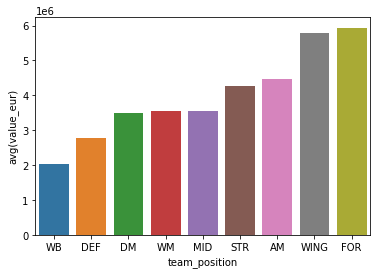

In [0]:
# Map weighted positions back to strings for readable visualization
all_agg_rev = all_agg.withColumn('team_position', reverse_mapping_expr[all_agg['team_position']])

# convert the new dataframe to a pandas dataframe
# "rev" here is for "reverse"
# as the mapping has been reversed to make it readable
all_df = all_agg_rev.toPandas()
sns.barplot(x="team_position", y="avg(value_eur)", data=all_df)
# displaying using pyplot
# sns is used like css for plt
display(plt.show())

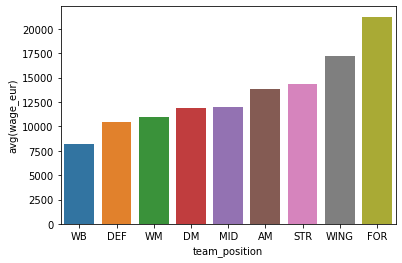

In [0]:
# Map weighted positions back to strings for readable visualization
all_agg_wage_rev = all_agg_wage.withColumn('team_position', reverse_mapping_expr[all_agg_wage['team_position']])

all_wage_df = all_agg_wage_rev.toPandas()
sns.barplot(x="team_position", y="avg(wage_eur)", data=all_wage_df)
display(plt.show())

# Goal 2: Determine whether potential is an accurate gauge of growth over a 6 year period.

# Goal 2: Data Pre-Processing

In [0]:
display(print_datasets_size(players_21))
# create datasets with columns
# needed to find potential and actualized_potential
players_21_pot = players_21.select(columns_to_use)
players_15_pot = players_15.select(columns_to_use)
print(players_21_pot.columns)

Rows: 6810 , Columns: 50
['sofifa_id', 'short_name', 'age', 'height_cm', 'weight_kg', 'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'team_position', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_standing_tackle', 'defending_sliding_tackle']

In [0]:
# create dataframes for each year
# with only necessary columns
# .select() takes a list of columns
# columns_to_use was created earlier
players_16_pot = players_16.select(columns_to_use)
players_17_pot = players_17.select(columns_to_use)
players_18_pot = players_18.select(columns_to_use)
players_19_pot = players_19.select(columns_to_use)
players_20_pot = players_20.select(columns_to_use)

In [0]:
# get potential from all 6 data sets.
# find highest overall of each player in all data sets
# set this as "actualised_potential"

In [0]:
from functools import reduce  # For Python 3.x
from pyspark.sql import DataFrame

def unionAll(*dfs):
    return reduce(DataFrame.unionAll, dfs)
# union is a type of join
# here we join all potential related datasets.
# easy access to historical data.
all_pot = unionAll(players_15_pot, players_16_pot, players_17_pot, players_18_pot, players_19_pot, players_20_pot, players_21_pot)

In [0]:
# data set has over 40k rows
# and 50 columns
print_datasets_size(all_pot)

Rows: 44309 , Columns: 50

In [0]:
  # create a new column and give it the value of OVERALL
  # for now. later this will hold the value of that players highest overall
  all_pot = all_pot.withColumn('actualised_potential', all_pot.overall)

In [0]:
# sort the dataframe by overall rating.
all_pot = all_pot.sort("overall", ascending=False)

In [0]:
display(all_pot)

sofifa_id,short_name,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,actualised_potential
20801,Cristiano Ronaldo,31,185,80,1,94,94,87000000,575000,Right,5,4,5,High/Low,LW,92,92,81,91,33,80,84,93,87,82,88,93,81,77,72,92,91,92,90,96,63,94,95,92,80,92,63,29,94,85,85,86,31,23,94
158023,L. Messi,32,170,72,1,94,94,95500000,575000,Left,5,4,4,Medium/Low,RW,87,92,92,96,39,66,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,37,26,94
158023,L. Messi,31,170,72,1,94,94,110500000,575000,Left,5,4,4,Medium/Medium,RW,88,91,88,96,32,61,77,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,28,26,94
158023,L. Messi,28,170,72,1,94,95,111000000,550000,Left,5,4,4,Medium/Low,RW,92,88,86,95,24,62,80,93,71,88,85,96,89,90,79,96,95,90,92,92,95,80,68,76,59,88,48,22,90,90,74,null,23,21,94
20801,Cristiano Ronaldo,32,185,80,1,94,94,95500000,575000,Right,5,4,5,High/Low,LW,90,93,82,90,33,80,85,94,88,83,88,91,81,76,77,93,89,91,89,96,63,94,95,92,80,92,63,29,95,85,85,95,31,23,94
20801,Cristiano Ronaldo,33,187,83,1,94,94,77000000,400000,Right,5,4,5,High/Low,ST,90,93,81,89,35,79,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,31,23,94
158023,L. Messi,33,170,72,1,93,93,67500000,560000,Left,5,4,4,Medium/Low,CAM,85,92,91,95,38,65,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,35,24,93
20801,Cristiano Ronaldo,30,185,80,1,93,93,85500000,475000,Right,5,4,5,High/Low,LM,92,93,80,91,33,78,82,95,86,81,87,93,88,77,72,91,91,93,90,92,62,94,94,87,79,93,62,29,93,81,85,null,31,23,93
158023,L. Messi,30,170,72,1,93,93,105000000,575000,Left,5,4,4,Medium/Medium,RW,89,90,86,96,26,61,77,95,71,88,85,97,89,90,87,95,92,87,90,95,95,85,68,73,59,88,48,22,93,90,74,96,28,26,93
158023,L. Messi,27,169,67,1,93,95,100500000,550000,Left,5,3,4,Medium/Low,CF,93,89,86,96,27,63,84,94,71,89,85,96,89,90,76,96,96,90,94,94,95,80,73,77,60,88,48,22,92,90,76,null,21,20,93


In [0]:
# drop the duplicates by index sofifa_id
# this drops all duplicates and keeps the first one encountered
# as the dataframe is ordered by overall, the highest overall for 
# each player is held in the overall category. (and actualized_potential)
all_pot = all_pot.dropDuplicates(['sofifa_id'])

In [0]:
display(all_pot.sort("overall", ascending=False))

sofifa_id,short_name,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,actualised_potential
20801,Cristiano Ronaldo,31,185,80,1,94,94,87000000,575000,Right,5,4,5,High/Low,LW,92,92,81,91,33,80,84,93,87,82,88,93,81,77,72,92,91,92,90,96,63,94,95,92,80,92,63,29,94,85,85,86,31,23,94
158023,L. Messi,28,170,72,1,94,95,111000000,550000,Left,5,4,4,Medium/Low,RW,92,88,86,95,24,62,80,93,71,88,85,96,89,90,79,96,95,90,92,92,95,80,68,76,59,88,48,22,90,90,74,null,23,21,94
176580,L. Suárez,29,182,85,1,92,92,83000000,525000,Right,5,4,4,High/Medium,ST,82,90,79,87,42,79,77,94,77,83,88,86,86,84,64,91,88,77,86,93,60,87,69,89,76,86,78,41,92,84,85,83,45,38,92
190871,Neymar,24,174,68,1,92,95,109000000,450000,Right,5,5,5,High/Medium,LW,91,84,78,95,30,56,75,89,62,81,83,96,78,79,75,95,93,90,96,88,82,78,61,70,49,77,56,36,90,80,81,80,24,33,92
155862,Sergio Ramos,32,184,82,1,91,91,51000000,375000,Right,4,3,3,High/Medium,LCB,75,63,71,71,91,84,66,60,91,78,66,61,73,67,72,84,76,75,78,85,66,79,93,84,83,55,84,90,52,63,68,80,92,91,91
188545,R. Lewandowski,28,185,79,1,91,91,92000000,350000,Right,4,4,3,High/Medium,ST,81,88,75,86,38,82,62,91,85,83,87,85,77,84,65,89,79,83,78,91,80,88,84,79,84,83,80,39,91,78,81,87,42,19,91
192985,K. De Bruyne,27,181,70,1,91,92,102000000,350000,Right,4,5,4,High/High,RCM,77,86,92,87,60,78,93,83,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,60,87,94,79,88,58,51,91
183277,E. Hazard,27,173,74,1,91,91,93000000,325000,Right,4,4,4,High/Medium,LW,91,82,86,94,35,67,81,84,61,89,80,95,83,79,83,94,93,89,95,90,94,80,56,83,66,80,54,41,87,89,86,91,27,22,91
177003,L. Modrić,32,172,66,1,91,91,67000000,425000,Right,4,4,4,High/High,RCM,76,76,90,91,70,67,86,72,55,93,76,90,85,78,88,93,80,72,93,90,94,79,68,89,58,82,62,83,79,92,82,84,76,73,91
173731,G. Bale,26,183,74,1,90,90,72000000,375000,Left,4,3,4,High/Medium,RW,94,87,84,86,57,76,87,87,82,86,76,89,86,85,80,88,93,95,77,87,65,91,79,78,80,90,65,59,86,79,76,85,55,52,90


In [0]:
# drop all columns except
# index (sofifa_id) AND actualized_potential
# this is all potential remaining columns
# this will be joined with the fifa 15 players.
all_pot_rem_col = all_pot.drop(*columns_to_use_nofifaId)

In [0]:
display(all_pot_rem_col.sort("overall", ascending=False))

sofifa_id,actualised_potential
158023,94
20801,94
176580,92
190871,92
183277,91
188545,91
177003,91
155862,91
192985,91
182493,90


In [0]:
# here we left outer join the fifa 15 player data set
# with the next 6 years
# this gives a dataframe with players and their potential
# and then their actualized_potential
# allowing us to compare predicted potential to resulted potential
all_act_pot = players_15_pot.join(all_pot_rem_col, on=['sofifa_id'], how='left_outer')

In [0]:
display(all_act_pot.sort("overall", ascending=False))

sofifa_id,short_name,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,actualised_potential
158023,L. Messi,27,169,67,1,93,95,100500000,550000,Left,5,3,4,Medium/Low,CF,93,89,86,96,27,63,84,94,71,89,85,96,89,90,76,96,96,90,94,94,95,80,73,77,60,88,48,22,92,90,76,null,21,20,94
20801,Cristiano Ronaldo,29,185,80,1,92,92,79000000,375000,Right,5,4,5,High/Low,LW,93,93,81,91,32,79,83,95,86,82,87,93,88,79,72,92,91,94,93,90,63,94,94,89,79,93,63,24,91,81,85,null,31,23,94
41236,Z. Ibrahimović,32,195,95,1,90,90,52500000,275000,Right,5,4,4,Medium/Low,ST,76,91,81,86,34,86,76,91,76,84,92,88,80,80,76,90,74,77,86,85,41,93,72,78,93,88,84,20,86,83,91,null,41,27,90
41,Iniesta,30,170,65,1,89,89,36000000,250000,Right,5,4,4,High/Medium,LCM,75,72,89,91,59,63,85,73,54,93,74,92,80,70,89,94,76,75,83,90,86,65,54,78,59,75,58,68,87,93,71,null,57,56,89
7826,R. van Persie,30,187,71,1,88,88,40500000,230000,Left,5,3,4,Medium/Low,RS,74,90,82,83,33,68,81,91,73,85,92,84,86,81,75,87,73,74,80,88,59,90,59,72,72,86,55,34,90,82,86,null,32,21,88
183277,E. Hazard,23,173,74,1,88,90,40500000,210000,Right,4,4,4,High/Medium,LM,90,82,84,91,32,64,78,83,57,87,79,92,82,79,82,89,93,87,92,85,90,79,59,74,63,82,54,41,84,86,86,null,27,22,91
188545,R. Lewandowski,25,184,78,1,87,89,44000000,210000,Right,4,4,4,High/Medium,LS,80,84,74,85,39,78,62,87,83,83,82,84,77,68,65,87,79,81,80,88,81,84,83,75,79,80,80,39,87,78,77,null,42,25,91
121939,P. Lahm,30,170,66,1,87,87,24500000,190000,Right,4,3,3,High/High,RCM,76,56,84,83,87,67,84,47,64,88,66,80,77,59,84,85,77,76,83,92,92,57,72,88,59,65,58,93,69,84,72,null,88,95,88
173731,G. Bale,24,183,74,1,87,91,39000000,200000,Left,4,3,4,High/Medium,RW,94,83,83,84,63,81,84,81,74,84,76,87,87,85,80,85,93,95,77,84,65,87,67,90,79,88,77,59,83,79,76,null,65,62,90
155862,Sergio Ramos,28,183,75,1,87,87,31500000,220000,Right,4,3,3,High/Medium,LCB,79,61,71,66,87,82,74,59,86,76,55,52,73,64,70,83,79,79,84,82,60,71,91,82,80,55,83,87,52,63,68,null,89,90,91


In [0]:
# we end up with 5770 players
print_datasets_size(all_act_pot)

Rows: 5770 , Columns: 51

# Goal 2: Data Processing

In [0]:
import numpy as np

In [0]:
# Mean Squared Error = MSE
# actual = actualised potential
# pred = potential
actual = all_act_pot.select('actualised_potential').collect()
pred = all_act_pot.select('potential').collect()

mse = np.square(np.subtract(actual, pred)).mean()

In [0]:
# MSE = 14.864124783362218
print(mse)

14.864124783362218

In [0]:
sqrt_mse = np.sqrt(mse)
print(sqrt_mse)

3.8554020261656525

In [0]:
from sklearn.metrics import mean_absolute_error as mae

#calculate MAE
mae = mae(actual, pred)
# MAE = 2.7334488734835354
print(mae)

2.7334488734835354

# Goal 3: Train a potential model to predict future potential

# Goal 3: Data Pre-Processing

In [0]:
# Doing linear regression
# what do we need?
print(all_act_pot.columns)

['sofifa_id', 'short_name', 'age', 'height_cm', 'weight_kg', 'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'team_position', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_standing_tackle', 'defending_sliding_tackle', 'actualised_potential']

In [0]:
# what variations of preferred foot can a player have?
# left and right
display(all_act_pot.select("preferred_foot").distinct())

preferred_foot
Left
Right


In [0]:
# workrate labelled as def/att 
# low = 1.0
# med = 2.0
# high = 3.0
# e.g. low/high = 1.0 + 3.0 = 4.0
# allows workrates to be rewarded equally
wr_weight_dict = {'Medium/Medium': 4.0, 'High/Medium': 5.0, 'Low/High': 4.0, 'Low/Low': 2.0, 'High/High': 6.0, 'Medium/Low' : 3.0, 'High/Low': 4.0, 'Medium/High': 5.0, 'Low/Medium': 3.0}

# create mapping expression
wr_mapping_expr = create_map([lit(x) for x in chain(*wr_weight_dict.items())])
# apply mapping expression
all_act_pot = all_act_pot.withColumn('work_rate', wr_mapping_expr[all_act_pot['work_rate']])
# show different results
display(all_act_pot.select("work_rate").distinct())

work_rate
4.0
3.0
2.0
6.0
5.0


In [0]:
# Same again - create mapping for preferred foot.
# Turn Preferred Foot into a binary indicator variable
pref_foot_weight_dict = {'Left' : 0, 'Right' : 1}

pref_foot_mapping_expr = create_map([lit(x) for x in chain(*pref_foot_weight_dict.items())])

all_act_pot = all_act_pot.withColumn('preferred_foot', pref_foot_mapping_expr[all_act_pot['preferred_foot']])

display(all_act_pot.select("preferred_foot").distinct())

preferred_foot
1
0


In [0]:
all_act_pot_pd = all_act_pot.toPandas()

# Goal 3: Data Processing & Visualization

In [0]:
#Split max overall as a Target value
target = all_act_pot_pd['actualised_potential']

# remove original potential prediction
# as this adds bias to our model
df2 = all_act_pot_pd.drop(['potential', 'actualised_potential', 'short_name', 'team_position', 'mentality_composure'], axis = 1)

#Splitting into test and train
from sklearn.model_selection import train_test_split

# call train test split so we have 4 dataframes for linear regression
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.2)

# what do they look like?
print(X_test.shape, X_train.shape)
print(y_test.shape, y_train.shape)

(1154, 46) (4616, 46)
(1154,) (4616,)

In [0]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# create our model
model = LinearRegression()

# define model dimensions
model.fit(X_train, y_train)

# train and predict
predictions = model.predict(X_test)

# assess the accuracy of new model
#Finding the r2 score and root mean squared error
new_r2 = r2_score(y_test, predictions)
new_RMSE = np.sqrt(mean_squared_error(y_test, predictions))

# print out what we find
print('r2 score: ' + str(new_r2))
print('RMSE : ' + str(new_RMSE))

r2 score: 0.704546827026823
RMSE : 3.5762358521206266

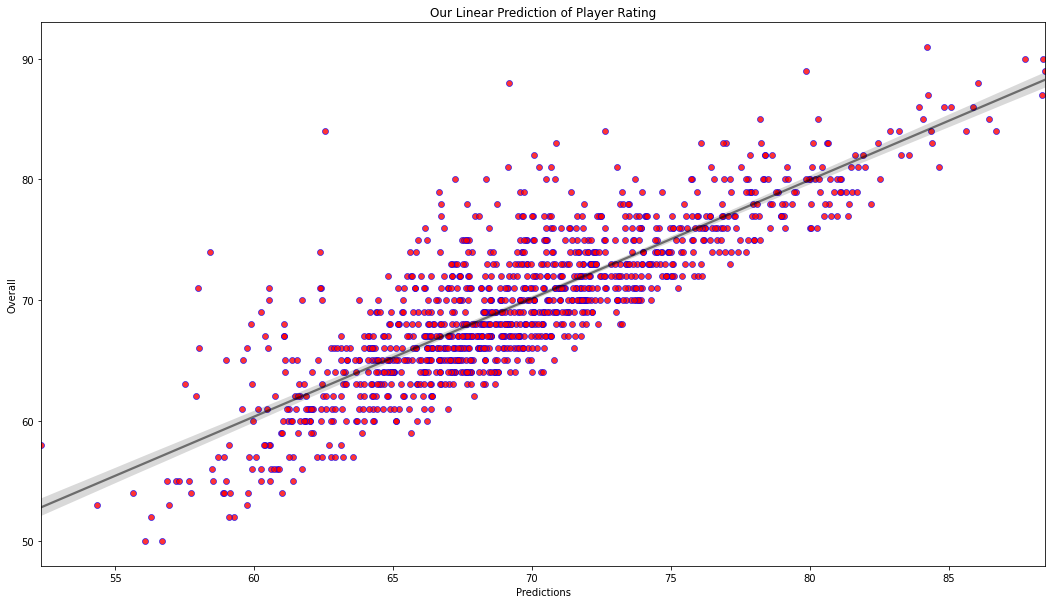

In [0]:
# use mat plot lib to display the linaer regression model
# use seaborn(sns) to style it
plt.figure(figsize=(18,10))
sns.regplot(predictions, y_test, scatter_kws={'color':'red','edgecolor':'blue','linewidth':'0.7'}, line_kws={'color':'black','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Our Linear Prediction of Player Rating")
display(plt.show())

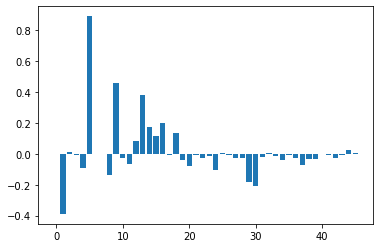

In [0]:
from matplotlib import pyplot

# importance analysis
# will help see which features
# change the outcome of the linear regression model
# more than other features

# map the model coefficints to importance array
importance = model.coef_
# importance_arr is an empty array of type float
importance_arr = np.empty([46], dtype='float')

# for every entry in importance
# map it to corresponding space in importance_arr
for i,v in enumerate(importance):
    importance_arr[i] = v 
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
display(pyplot.show())

In [0]:
import pandas as pd
# create a pandas dataframe of all columns
d = {'Feature': df2.columns, 'Importance': importance_arr}
# map column names with entries in importance_arr
# so we know which columns map to what importance float
importance_df = pd.DataFrame(data=d)

display(importance_df)

Feature,Importance
sofifa_id,-9.649769925481005E-7
age,-0.3890804123934307
height_cm,0.013120989712792658
weight_kg,-0.005071038474101107
league_rank,-0.09195019853358631
overall,0.8912564835723622
value_eur,1.4916455790858634E-8
wage_eur,-5.91939887079616E-6
preferred_foot,-0.1385597423364164
international_reputation,0.460481311178516


In [0]:
# Remove actualised potential, perform linear regression using the Fifa predictions (potential col)
# and use actualised_potential as target
# to obtain RMSE and R2 values

#Split max overall as a Target2 value
target2 = all_act_pot_pd['potential']

df3 = all_act_pot_pd.drop(['actualised_potential', 'short_name', 'team_position', 'mentality_composure'], axis = 1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(df3, target, test_size=0.2)

model2 = LinearRegression()
model2.fit(X_train2, y_train2)
predictions2 = model2.predict(X_test2)

original_r2 = r2_score(y_test2, predictions2)
original_RMSE = np.sqrt(mean_squared_error(y_test2, predictions2))

print('r2 score: ' + str(original_r2))
print('RMSE : ' + str(original_RMSE))

r2 score: 0.7480711541348362
RMSE : 3.3163987228574827

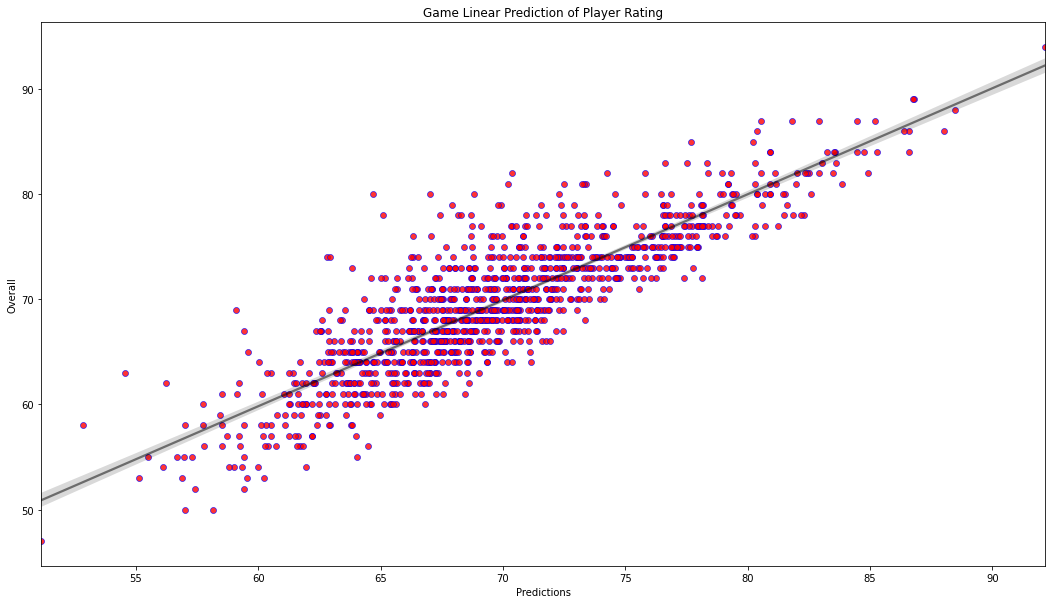

In [0]:
# taking a look at a linaer regression plot
# of the original potential ratings within the game
plt.figure(figsize=(18,10))
sns.regplot(predictions2, y_test2, scatter_kws={'color':'red','edgecolor':'blue','linewidth':'0.7'}, line_kws={'color':'black','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Game Linear Prediction of Player Rating")
display(plt.show())